In [22]:
'''
File name: Comments.ipynb
Author: Lolo
Date created: 12/11/2022
Date last modified: 14/11/2022
Python Version: 3.9.12
'''

'\nFile name: Comments.ipynb\nAuthor: Lolo\nDate created: 12/11/2022\nDate last modified: 14/11/2022\nPython Version: 3.9.12\n'

In [23]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

#set the seed
np.random.seed(4)

DATA_PATH = './data/'
DEFAULT_ENCODING = 'UTF8'
DEFAULT_COMPRESSION = 'gzip'

## Taking csv tranformed file from Flo

In [2]:
df_BA_reviews = pd.read_csv(DATA_PATH + 'df_BA_reviews.csv')

In [3]:
df_BA_reviews.head()

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,2015-08-20 10:00:00,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.0,2.88,"From a bottle, pours a piss yellow color with ..."
1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2009-02-20 11:00:00,StJamesGate,stjamesgate.163714,3.00,3.50,3.50,4.00,3.5,3.67,Pours pale copper with a thin head that quickl...
2,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2006-03-13 11:00:00,mdagnew,mdagnew.19527,4.00,3.50,3.50,4.00,3.5,3.73,"500ml Bottle bought from The Vintage, Antrim....."
3,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2004-12-01 11:00:00,helloloser12345,helloloser12345.10867,4.00,3.50,4.00,4.00,4.5,3.98,Serving: 500ml brown bottlePour: Good head wit...
4,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2004-08-30 10:00:00,cypressbob,cypressbob.3708,4.00,4.00,4.00,4.00,4.0,4.00,"500ml bottlePours with a light, slightly hazy ..."


### Visualizations:  length of the comments

#### with subset of the data

In [4]:
df_BA_subset = df_BA_reviews.loc[0:999]

In [5]:
nbr_words_per_comment_subset = list(map(len,df_BA_subset['text']))

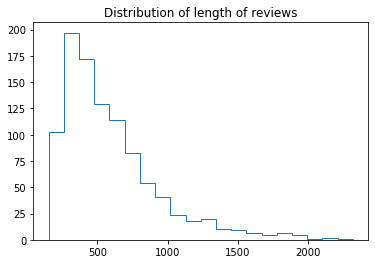

In [6]:
plt.hist(nbr_words_per_comment_subset, bins=20,histtype='step')
plt.title('Distribution of length of reviews')
plt.show()


#### with whole data

In [26]:
BA_texts = df_BA_reviews['text'].copy() # So we don't mess with the actual dataframe

In [27]:
nbr_words_per_comment = list(map(len,BA_texts))

TypeError: object of type 'float' has no len()

We get an **error** since some comments are *float* instead of *string*.

In [28]:
list_types = list(map(type,BA_texts)) # get the a list of the type for each row
print(f'Number of comment that are float: {list_types.count(float)}')

Number of comment that are float: 2


In [29]:
# getting rid of the 2 float comments

for i in range(list_types.count(float)):
    index_to_transform_to_string = list_types.index(float)
    BA_texts[index_to_transform_to_string] = str(BA_texts[index_to_transform_to_string]) #transform the float to a str

    list_types = list(map(type,BA_texts))# update list of types


#making sure there is no float anymore
print(f'Number of comment that are float: {list_types.count(float)}')



Number of comment that are float: 0


In [30]:
nbr_words_per_comment = list(map(len,BA_texts))

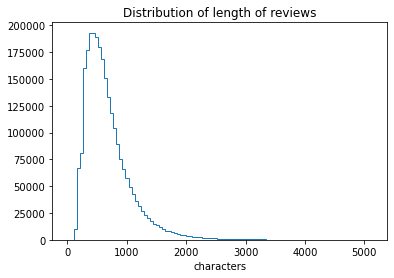

In [36]:
plt.hist(nbr_words_per_comment, bins=100,log=False,histtype='step')
plt.title('Distribution of length of reviews')
plt.xlabel('characters')
plt.show()
